In [1]:
from scipy.optimize import minimize, linprog
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
grid_large_join = gpd.read_file('GIS_data/grid_large_people.shp')

In [3]:
grid_large_join_2 = grid_large_join[grid_large_join['people_mea']<grid_large_join['SUM_pop']]

In [4]:
def zip_and_multiply(list1, list2):
    return [a*b for a, b in zip(list1, list2)]

In [5]:
GHG_mean = list(grid_large_join_2['GHG_mean'])
people_mea = list(map(int, list(grid_large_join_2['people_mea'])))
SUM_pop = list(map(int, list((grid_large_join_2['SUM_pop']))))
emisions_allowance = 52000
init = [0]*len(SUM_pop)
bounds_init = [(0, None)]*len(SUM_pop)

In [6]:
def objective_func(x): 
    func = 0
    for i in range(len(people_mea)):
        func+=x[i]*people_mea[i]
    func_2 = (-1)*func
    return func_2

In [7]:
def ineq_allowance(x): 
    func = 0
    for i in range(len(people_mea)):
        func += GHG_mean[i]*0.2*x[i]*people_mea[i]
    constraint = emisions_allowance - func
    return constraint

In [7]:
def constfun_ineq(i):
    def helper(x):
        return -x[i]*people_mea[i] + SUM_pop[i]
    return helper

In [8]:
cons = []
for i in range(len(SUM_pop)):
    tot_people = {'type': 'ineq', 'fun': constfun_ineq(i)}
    cons.append(tot_people)
emis_allow = {'type': 'ineq', 'fun': lambda x: ineq_allowance(x)}
cons.append(emis_allow)

In [9]:
res = minimize(objective_func, init, method='SLSQP', bounds=bounds_init, constraints=cons)

In [10]:
x_result = res.x

In [11]:
grid_large_join_2['x_result'] = x_result
grid_large_join_2['people_serve'] = grid_large_join_2['x_result']*grid_large_join_2['people_mea']

C:\Users\Olga\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Olga\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [218]:
grid_large_join_2.to_file('GIS_data/grid_large_people_served.shp')

# Linear Optimization

In [6]:
C = [i * (-0.1) for i in people_mea]

In [7]:
people_mea_person = [i * 0.1 for i in people_mea]

In [8]:
A=[zip_and_multiply(GHG_mean,people_mea_person)]

In [9]:
array_emissions = []
array_water = []

In [10]:
b = 29600

In [11]:
max_systems = [a/b for a, b in zip(SUM_pop, people_mea)]

In [12]:
bounds_init = [(0, i) for i in max_systems]

In [13]:
res = linprog(C, A_ub=A, b_ub=b, bounds=bounds_init, options={"disp": True})

Optimization terminated successfully.
         Current function value: -114955.250446
         Iterations: 124


In [14]:
people_served = [a*b for a, b in zip(res.x, people_mea)]

In [15]:
grid_large_join_2['people_serve'] = people_served

C:\Users\Olga\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [245]:
grid_large_join_2.to_file('GIS_data/grid_large_people_served.shp')

# Graph

In [16]:
array_emissions = []
array_water = []
b = 15000
num_people =836620
C = [i * (-0.1) for i in people_mea]
people_mea_person = [i * 0.1 for i in people_mea]
A=[zip_and_multiply(GHG_mean,people_mea_person)]
max_systems = [a/b for a, b in zip(SUM_pop, people_mea)]
bounds_init = [(0, i) for i in max_systems]

In [17]:
init = linprog(C, A_ub=A, b_ub=b, bounds=bounds_init, options={"disp": True})

Optimization terminated successfully.
         Current function value: -73630.046111
         Iterations: 53


In [18]:
initial_capacity = 132700
initial_value = b/num_people

In [19]:
for i in range(10, 40, 2):
    emissions = b*i/10
    res = linprog(C, A_ub=A, b_ub=emissions, bounds=bounds_init, options={"disp": True})
    store = res.fun*(-1)
    array_emissions.append(i/10)
    array_water.append(store)

Optimization terminated successfully.
         Current function value: -73630.046111
         Iterations: 53
Optimization terminated successfully.
         Current function value: -83365.860620
         Iterations: 64
Optimization terminated successfully.
         Current function value: -92448.046636
         Iterations: 76
Optimization terminated successfully.
         Current function value: -100778.917923
         Iterations: 95
Optimization terminated successfully.
         Current function value: -108594.258761
         Iterations: 115
Optimization terminated successfully.
         Current function value: -115911.978557
         Iterations: 127
Optimization terminated successfully.
         Current function value: -122752.731947
         Iterations: 141
Optimization terminated successfully.
         Current function value: -128886.831838
         Iterations: 147
Optimization terminated successfully.
         Current function value: -132779.400000
         Iterations: 152
Optimiza

In [20]:
array_increase = [(i/initial_capacity)*100 for i in array_water]
array_emiss_increase = [(i-1)*100 for i in array_emissions]

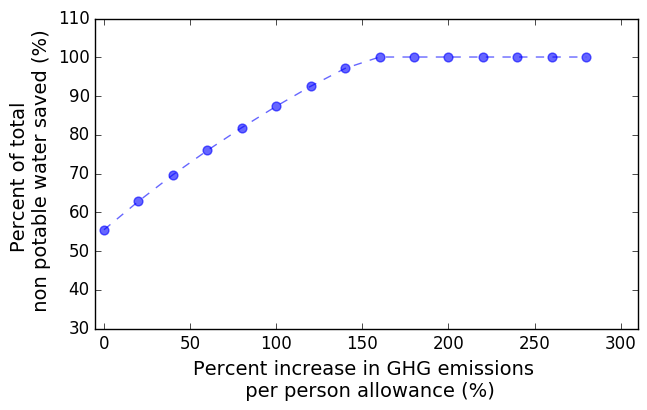

In [31]:
plt.figure(figsize=(7,4))
plt.scatter(array_emiss_increase,array_increase, s=40, color = 'b', alpha=0.6)
plt.plot(array_emiss_increase,array_increase, linestyle = '--', color='b', alpha=0.6)
plt.xlabel('Percent increase in GHG emissions \n per person allowance (%)', fontsize = 14)
plt.ylabel('Percent of total \n non potable water saved (%)',  fontsize = 14)
plt.xlim(-5,310)
plt.ylim(30,110)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()